In [70]:
import numpy
import math
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['font.size'] = 16
%matplotlib inline

# 1

In [448]:
N = 200
x_start,x_end = -4.0,4.0
y_start,y_end = -2.0,2.0
x=numpy.linspace(x_start,x_end,N)
y=numpy.linspace(y_start,y_end,N)
X,Y = numpy.meshgrid(x,y)

In [449]:
str_source = 2
x_source,y_source = -2.0,0.0

str_sink = -2
x_sink,y_sink = 2.0,0.0

In [450]:
def get_vel(strength,xs,ys,X,Y):
    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    return u,v

def get_stream(strength,xs,ys,X,Y):
    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ys),(X-xs))
    return psi

def get_potential(strength,xs,ys,X,Y):
    phi = strength/(numpy.pi*2)*numpy.log(numpy.sqrt((X-xs)**2+(Y-ys)**2))
    return phi

In [451]:
u_source,v_source = get_vel(str_source,x_source,y_source,X,Y)
psi_source = get_stream(str_source,x_source,y_source,X,Y)
phi_source = get_potential(str_source,x_source,y_source,X,Y)

u_sink,v_sink = get_vel(str_sink,x_sink,y_sink,X,Y)
psi_sink = get_stream(str_sink,x_sink,y_sink,X,Y)
phi_sink = get_potential(str_sink,x_sink,y_sink,X,Y)

In [452]:
u=u_sink+u_source
v=v_sink+v_source
psi=psi_source+psi_sink
phi = phi_source+phi_sink

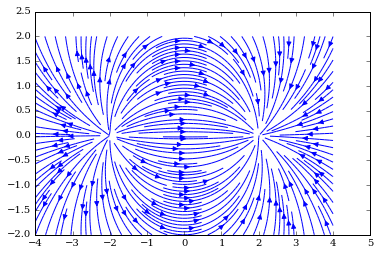

In [453]:
pyplot.streamplot(X,Y,u,v,density=2);

In [454]:
dy = (y_end-y_start)/(N-1)
dy#=Y[-1,-1]-Y[0,-1]

0.020100502512562814

In [455]:
numpy.sum(numpy.absolute(u[:,-1]))*dy

0.29580469637661905

In [456]:
psi[0,-1]-psi[-1,-1]

0.29516723530086653

In [457]:
#interpolate for values at x=0
u_avg = (u[:,N/2]+u[:,(N-1)/2])/2

/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


In [458]:
numpy.sum(u_avg)*dy

1.0032257258439308

In [459]:
#interpolate for x=0
psi_int = (psi[:,N/2]+psi[:,(N-1)/2])/2

/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


In [460]:
psi_int[-1]-psi_int[0]

-0.99996784829818308

There are different values for arctan(0), -pi,0,pi, etc.

# 2

$\psi = \frac{\sigma}{2 \pi}arctan (\frac{y}{x})+ u_{\infty}y$

Plug in stagnation points,

$y = 0$

$x = x_{source}-\frac{\sigma}{2 \pi u_{\infty}}$

$\psi = \frac{\sigma}{2\pi} arctan(0) + (u_{\infty}\times 0)$

$\psi = \pm \pi \frac{\sigma}{2 \pi}$

$\psi = \pm \frac{\sigma}{2}$

# 3

Rankine Oval:

On the surface of the rankine oval, where $\psi = 0$, we have the equation:

$Uy - \sigma arctan(\frac{2(d/2)y}{x^{2}+y^{2}-(d/2)^{2}})=0$

where $U$ is the freestream velocity
- width:
first assume y<<1, set x=L

$Uy = \sigma arctan(\frac{2(d/2)y}{L^{2}-(d/2)^{2}})$

$Uy\approx \frac{\sigma 2(d/2)y}{L^{2}-(d/2)^{2}}$

$L \approx (d/2) \sqrt{1+\frac{2\sigma}{U(d/2)}}$

Above equation gives only half-width, multiply by two for full width

- height:
assume x=0, set y=h

$tan(\frac{Uh}{\sigma}) \approx \frac{2(d/2)h}{h^{2}-(d/2)^{2}}$

$tan[(\frac{U(d/2)}{\sigma})\frac {h}{(d/2)}] \approx 2\frac{h}{(d/2)}(\frac{1}{(\frac{h}{(d/2)})^{2} -1})$

$\frac {h}{(d/2)} \approx \frac{1}{2}[(\frac{h}{(d/2)})^{2}-1]tan(\frac{Uh}{\sigma})$

Iterate until $h$ converges and multiply by 2 for full height

taken from: http://www.cbeaume.com/download/FFMchap9.pdf

# 3a

In [461]:
u_inf = 1.0
u_freestream = u_inf*numpy.ones((N,N), dtype=float)
v_freestream = numpy.zeros_like(u_freestream)
psi_freestream = u_inf*Y

strength_source = 5.0
x_source,y_source = -1.0,0.0
u_source,v_source = get_vel(strength_source,x_source,y_source,X,Y)
psi_source = get_stream(strength_source,x_source,y_source,X,Y)

strength_sink=-5.0
x_sink,y_sink=1.0,0.0
u_sink,v_sink=get_vel(strength_sink,x_sink,y_sink,X,Y)
psi_sink=get_stream(strength_sink,x_sink,y_sink,X,Y)

u=u_freestream+u_source+u_sink
v = v_freestream+v_source+v_sink
psi = psi_freestream+psi_source+psi_sink

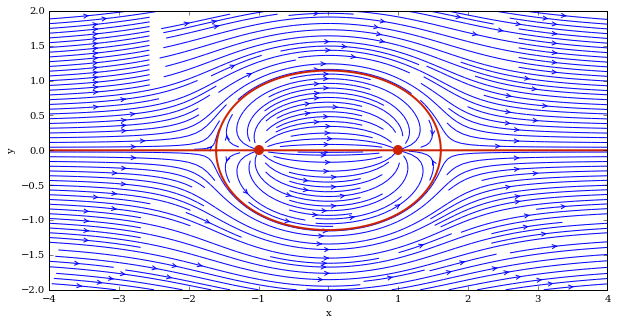

In [462]:
size=10
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.streamplot(X,Y,u,v, density=2, linewidth=1,arrowsize=1,arrowstyle='->')
pyplot.scatter([x_source,x_sink],[y_source,y_sink], color='#CD2305',s=80,marker='o')
pyplot.contour(X,Y,psi,levels=[0.],colors='#CD2305',linewidths=2,linestyles='solid');

In [463]:
d = x_sink-x_source
a = d/2
def iteration(h):
    half_height = a*0.5*((h**2/a)-1)*numpy.tan(2*numpy.pi*u_inf*a/strength_source*h/a)
    return half_height

In [464]:
iteration(1.143565)

1.1435636192457914

In [465]:
height =2*1.14356
print(height)

2.28712


In [466]:
length = 2*a*numpy.sqrt((strength_source/(numpy.pi*u_inf*a))+1)
print(length)

3.21965801347


# 3b

In [467]:
u_inf = 1.0
u_freestream = u_inf*numpy.ones((N,N), dtype=float)
v_freestream = numpy.zeros_like(u_freestream)
psi_freestream = u_inf*Y

strength_source = 10.0
x_source,y_source = -1.0,0.0
u_source,v_source = get_vel(strength_source,x_source,y_source,X,Y)
psi_source = get_stream(strength_source,x_source,y_source,X,Y)

strength_sink=-10.0
x_sink,y_sink=1.0,0.0
u_sink,v_sink=get_vel(strength_sink,x_sink,y_sink,X,Y)
psi_sink=get_stream(strength_sink,x_sink,y_sink,X,Y)

u=u_freestream+u_source+u_sink
v = v_freestream+v_source+v_sink
psi = psi_freestream+psi_source+psi_sink

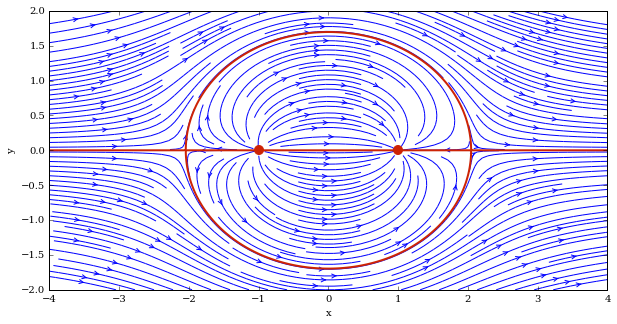

In [468]:
size=10
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.streamplot(X,Y,u,v, density=2, linewidth=1,arrowsize=1,arrowstyle='->')
pyplot.scatter([x_source,x_sink],[y_source,y_sink], color='#CD2305',s=80,marker='o')
pyplot.contour(X,Y,psi,levels=[0.],colors='#CD2305',linewidths=2,linestyles='solid');

In [469]:
d = x_sink-x_source
a = d/2
def iteration(h):
    half_height = a*0.5*((h**2/a)-1)*numpy.tan(2*numpy.pi*u_inf*a/strength_source*h/a)
    return half_height

In [470]:
iteration(1.6959)

1.6959220610757388

In [471]:
height = 1.6959*2
print(height)

3.3918


In [472]:
length = 2*a*numpy.sqrt((strength_source/(numpy.pi*u_inf*a))+1)
print(length)

4.09052508211


# 3c

In [473]:
u_inf = 0.3
u_freestream = u_inf*numpy.ones((N,N), dtype=float)
v_freestream = numpy.zeros_like(u_freestream)
psi_freestream = u_inf*Y

strength_source = 0.5
x_source,y_source = -1.5,0.0
u_source,v_source = get_vel(strength_source,x_source,y_source,X,Y)
psi_source = get_stream(strength_source,x_source,y_source,X,Y)

strength_sink=-0.5
x_sink,y_sink=2.0,0.0
u_sink,v_sink=get_vel(strength_sink,x_sink,y_sink,X,Y)
psi_sink=get_stream(strength_sink,x_sink,y_sink,X,Y)

u=u_freestream+u_source+u_sink
v = v_freestream+v_source+v_sink
psi = psi_freestream+psi_source+psi_sink

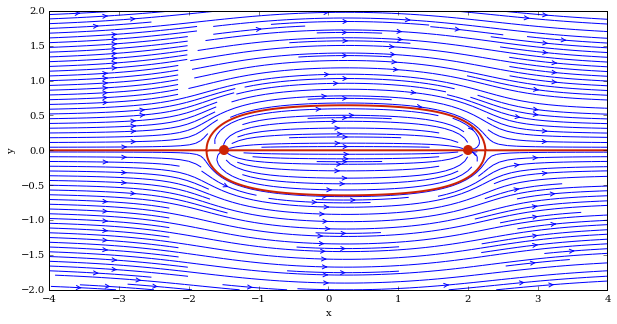

In [474]:
size=10
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.streamplot(X,Y,u,v, density=2, linewidth=1,arrowsize=1,arrowstyle='->')
pyplot.scatter([x_source,x_sink],[y_source,y_sink], color='#CD2305',s=80,marker='o')
pyplot.contour(X,Y,psi,levels=[0.],colors='#CD2305',linewidths=2,linestyles='solid');

In [475]:
d = x_sink-x_source
a = d/2
def iteration(h):
    half_height = a*0.5*((h**2/a)-1)*numpy.tan(2*numpy.pi*u_inf*a/strength_source*h/a)
    return half_height

In [476]:
iteration(0.63334)

0.6333096276749961

In [477]:
height = 2*0.6333
print(height)

1.2666


In [478]:
length = 2*a*numpy.sqrt((strength_source/(numpy.pi*u_inf*a))+1)
print(length)

3.99544932878


# 4

In [485]:
u_inf = 1.0
u_freestream = u_inf*numpy.ones((N,N), dtype=float)
v_freestream = numpy.zeros_like(u_freestream)
psi_freestream = u_inf*Y

strength_source = 5.0
x_source,y_source = -1.0,0.0
u_source,v_source = get_vel(strength_source,x_source,y_source,X,Y)
psi_source = get_stream(strength_source,x_source,y_source,X,Y)

u = u_freestream + u_source
v = v_freestream+v_source
psi = psi_freestream+psi_source

x_stagnation = x_source-strength_source/(2*numpy.pi*u_inf)
y_stagnation = y_source

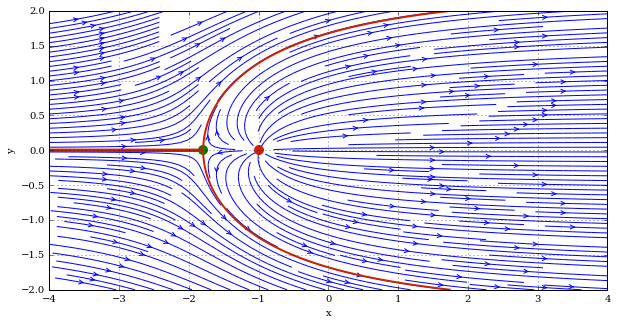

In [486]:
size=10
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.streamplot(X,Y,u,v,density=2,linewidth=1,arrowsize=1,arrowstyle='->')
pyplot.scatter(x_source,y_source,color='#CD2305',s=80,marker='o')

pyplot.scatter(x_stagnation,y_stagnation,color='g',s=80,marker='o')
pyplot.contour(X,Y,psi,levels=[-strength_source/2, +strength_source/2],colors='#CD2305',linewidths=2,linestyles='solid');

In [487]:
cp = 1.0-(u**2+v**2)/u_inf**2

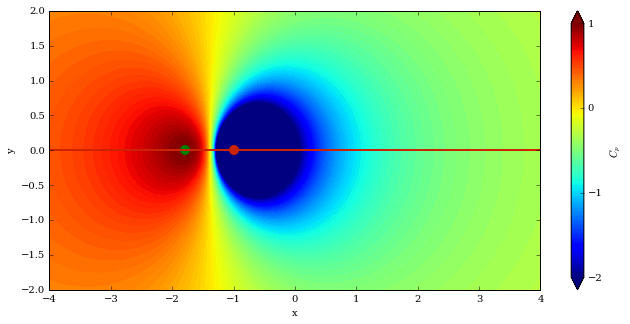

In [490]:
pyplot.figure(figsize = (1.1*size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
contf=pyplot.contourf(X,Y,cp,levels=numpy.linspace(-2.0,1.0,100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$')
cbar.set_ticks([-2.0,-1.0,0.0,1.0])
pyplot.scatter([x_source],[y_source],color='#CD2305',s=80,marker='o')
pyplot.scatter(x_stagnation,y_stagnation,color='g',s=80,marker='o')
pyplot.contour(X,Y,psi,levels=[0.],colors='#CD2305',linewidths=2,linestyles='solid');

The pressure is greatest at the stagnation point (velocity=0), and least at the source.